In [78]:
from pathlib import Path

import numpy
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [ ]:
straingst_df = pd.read_table("../Respiratory/StrainGE/StrainGST.tsv", index_col=[0,1])
straingst_df.head()

In [112]:
STRAINGR_DIR = Path("../Respiratory/StrainGE/Intermediate_files/StrainGR/summary/")

df_list = []
sample_names = []
for f in STRAINGR_DIR.glob("*.tsv"):
    df = pandas.read_csv(f, sep='\t', index_col=0)
    df = df.drop(index='TOTAL')  # Remove TOTAL statistics

    df_list.append(df)
    sample_names.append(f.stem)

straingr_df = pandas.concat(df_list, keys=sample_names, names=["sample"])

straingr_df['straingst_present'] = straingr_df.index.isin(straingst_df.index)

straingr_df.to_csv("../Respiratory/StrainGE/StrainGR_summary.tsv", sep='\t')

In [81]:

straingr_df['is_plasmid'] = straingr_df['length'] < 4e4
straingr_df['enough_cov'] = straingr_df['coverage'] > 0.5

In [ ]:


# Filter and re-index
straingr_df = straingr_df[straingr_df['straingst_present'] & ~straingr_df['is_plasmid'] & straingr_df['enough_cov']].reset_index().set_index(['sample', 'ref'])
straingr_df

# Comparison data

not yet finished

In [ ]:
Comparison_dir= Path("../Respiratory/StrainGE/Intermediate_files/StrainGR/comparisons/summary/")

# increases with time
comparison_list = list(Comparison_dir.glob("*.tsv"))
print(len(comparison_list) )

df_list =[]
for file in comparison_list:
    try: 
        df= pd.read_table(file, index_col=[0,1,2])
        df_list.append(df)
    except pd.errors.EmptyDataError:
        pass
    
compare_df = pandas.concat(df_list)
compare_df.to_csv("../Respiratory/StrainGE/Comparisons_temp.tsv",sep="\t")

In [100]:
straingr_df["Species"] = straingr_df.index.get_level_values(1).map(lambda s: " ".join(s.split("_",2)[:2]))

In [110]:
straingr_df.query('Species=="Stre pneumoniae"').index.get_level_values(0).unique().shape

(77,)

In [111]:
straingr_df.query('Species=="Stap aureus"').index.get_level_values(0).unique().shape

(15,)

In [93]:
# comparison

compare_df = pandas.read_csv("../Respiratory/StrainGE/Comparisons_temp.tsv", sep='\t', index_col=[0, 1, 2])

def both_straingst_present(ix):
    sample1, sample2, ref = ix

    return (sample1, ref) in straingr_df.index and (sample2, ref) in straingr_df.index

compare_df['both_present'] = compare_df.index.map(both_straingst_present)
compare_df = compare_df[compare_df['both_present']].copy()


# add species and genus

compare_df["Species"] = compare_df.index.get_level_values(2).map(lambda s: " ".join(s.split("_",2)[:2]))
compare_df["Genus"] = compare_df.index.get_level_values(2).str.split("_",1,expand=True).to_frame()[0].map({"Stre":"Streptococcus","Stap":"Staphylococcus"}).values




all_compare_df= compare_df.copy()


In [94]:
# filter
compare_df= all_compare_df.query("commonPct>20")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


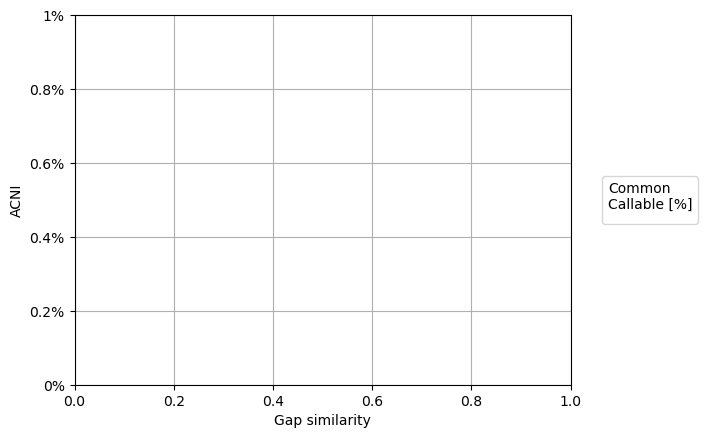

In [95]:
#plot

import seaborn as sns

sns.scatterplot(x="gapJaccardSim", y="singleAgreePct", size="commonPct", data=compare_df.query("Genus=='Streptococcus'"), hue="Species")

#plt.xlim(0.970, 1)
plt.xlabel("Gap similarity")

#plt.ylim(99.9, 100)
plt.ylabel("ACNI")
plt.gca().yaxis.set_major_formatter("{x:g}%")

plt.grid('on')
plt.legend(title="Common\nCallable [%]", loc="center left", bbox_to_anchor=(1.05, 0.5))

In [ ]:
#plot

import seaborn as sns

sns.scatterplot(x="gapJaccardSim", y="singleAgreePct", size="commonPct", 
                data=compare_df.query("Genus=='Staphylococcus'"), hue="ref")

#plt.xlim(0.970, 1)
plt.xlabel("Gap similarity")

#plt.ylim(99.9, 100)
plt.ylabel("ACNI")
plt.gca().yaxis.set_major_formatter("{x:g}%")

plt.grid('on')
plt.legend(title="Common\nCallable [%]", loc="center left", bbox_to_anchor=(1.05, 0.5))

StrainGR compares positions within the “callable genome” or the set of positions with any reference or alternative allele supported by at least two good reads and > 10% of the alignment pileup (Fig. 1c). To perform a comparison, only “common callable” positions are considered, which represent the subset of the callable genome for a given reference that is shared by two samples. Strain relationships can be assessed using two key metrics: (i) the Average Callable Nucleotide Identity (ACNI), or the percentage of common callable positions where both samples have a single identical base call, and (ii) a “gap similarity” metric, as patterns of large deletions are often conserved between closely related strains, which can provide an orthogonal metric of strain similarity [23]. The ACNI and gap similarity values that define two samples as containing the same “strain” depend on the research question [7]. For the purposes of this manuscript, we consider two samples to contain the same strain if ACNI is ≥ 99.95%, which

In [ ]:
compare_df.query("singleAgreePct>99.95") 